In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

#  Dog and Cat using RNN

### Team members:
* Ziyi Wang ID 18042783
* Youzhi Lei ID  19039281


## Content
* Loading datasets and resize data split to training and testing
* Using the RNN 
---


#### Information about datasets
#### Labeled dogs and cats from Microsoft
* Dogs and Cats image https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [1]:
#!pip install opencv-python

In [2]:
#!pip install tensorflow

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import patsy
import os
from PIL import Image 
import cv2
%matplotlib inline

In [104]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.10.0


In [105]:
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

pd.options.display.max_columns = 50

In [106]:
cwd = os.getcwd()
print(cwd)

/home/dp1/fredwork


In [107]:
DATADIR = "../Documents/fred/codes/machinelearning2019/kagglecatsanddogs/PetImages"
CATEGORIES = ["Dog","Cat"]

len(CATEGORIES)


        

2

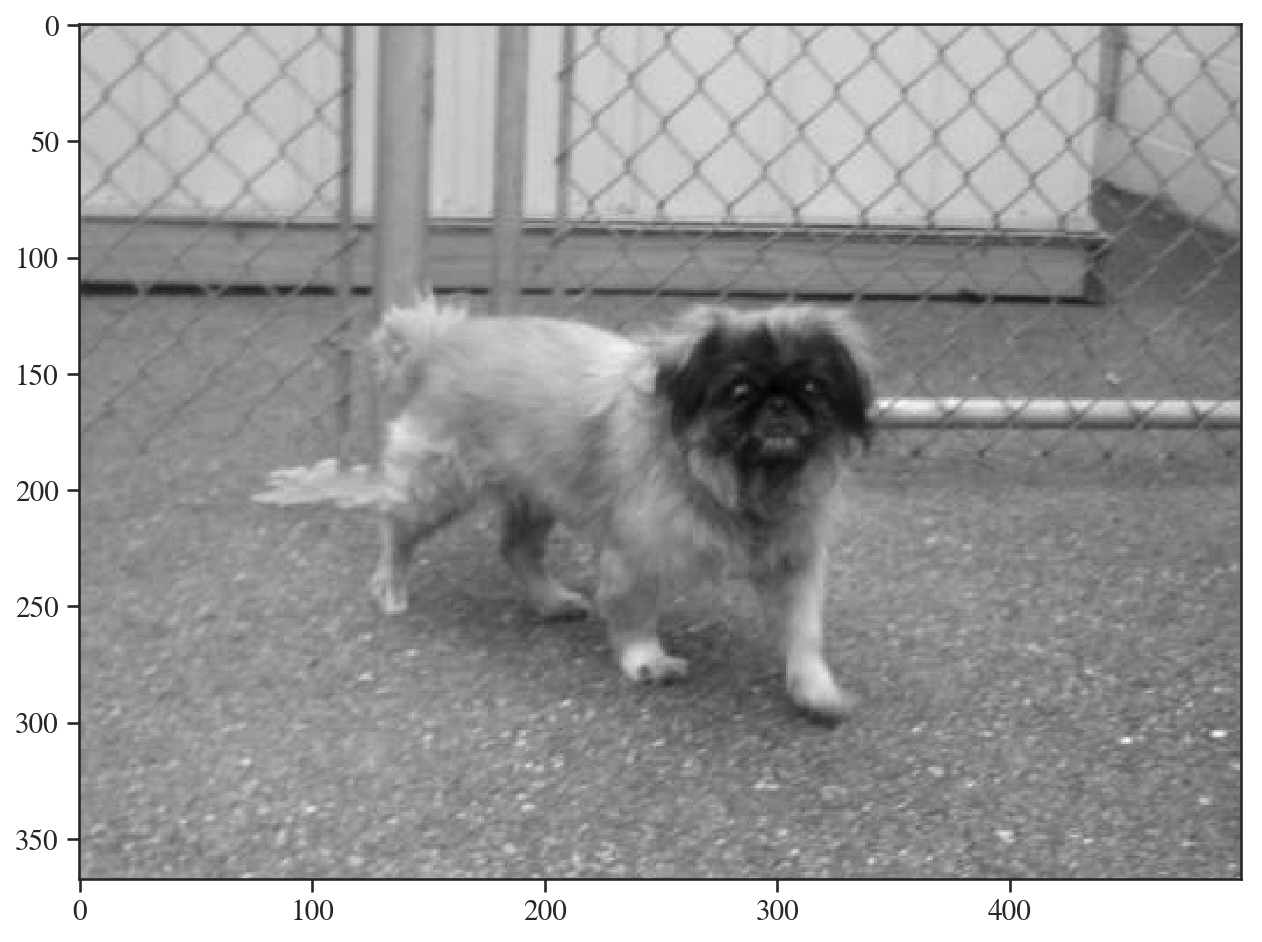

In [108]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)#path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)#read and make it to grey scale
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [109]:
print(img_array)

[[180 177 176 ... 139 125 128]
 [177 178 181 ... 137 124 127]
 [179 178 176 ... 145 133 135]
 ...
 [148 153 155 ... 115 106 108]
 [148 151 153 ... 106 107 114]
 [142 146 149 ... 140 163 178]]


<function matplotlib.pyplot.show(*args, **kw)>

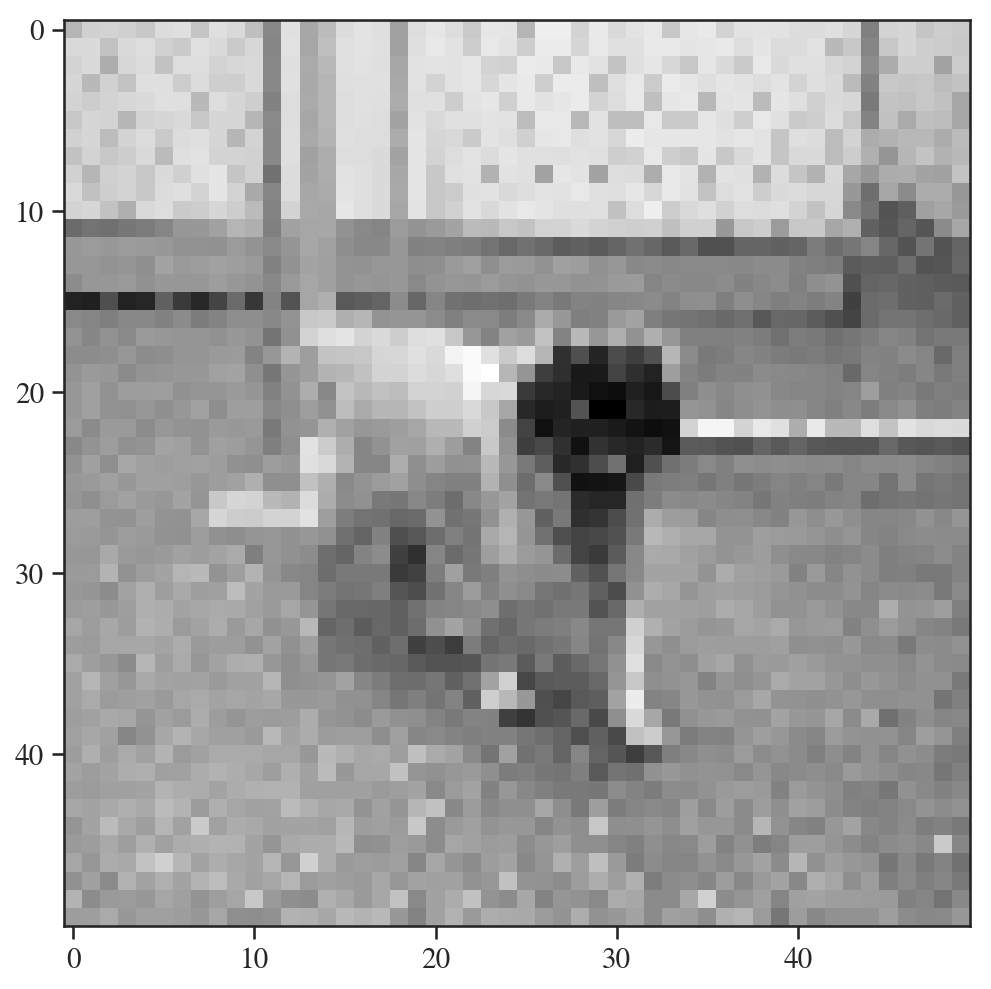

In [110]:
IMG_SIZE = 50

new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show

In [111]:
training_data = []
testing_data = []
import random
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        #conver the dog and cat to numerical value 0/1
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:
                #read and make it to grey scale
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                #resize operation
                new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                #small image and classfication name to training data
                randvalue =  random.randint(1, 2)
                if(randvalue == 1) :
                    training_data.append([new_array, class_num])
                else: 
                    testing_data.append([new_array, class_num])              
                
            except Exception as e:
                pass#pass the image if they broken
            
create_training_data()

In [112]:
print(len(training_data))
print(len(testing_data))


12400
12546


In [113]:
#seperate dataset
import random
random.shuffle(training_data)
#random.shuffle(testing_data)

In [114]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
1
0
0
0
0


In [115]:
#featurs set
train_images = []
#label
train_labels = []
#featurs set
test_images = []
#label
test_labels = []

In [116]:
for features, label in training_data:
    train_images.append(features)
    train_labels.append(label)
#conver numpy array in CNN network, -1 means how many featurs do we have and 1 means grey image
train_images = np.array(train_images).reshape(-1, IMG_SIZE, IMG_SIZE,1)
train_images.shape

(12400, 50, 50, 1)

In [117]:
for features, label in testing_data:
    test_images.append(features)
    test_labels.append(label)
#conver numpy array in CNN network, -1 means how many featurs do we have and 1 means grey image
test_images = np.array(test_images).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [118]:
import pickle

pickle_out = open("train_images.pickle", "wb")
pickle.dump(train_images, pickle_out)
pickle_out.close()

pickle_out = open("train_labels.pickle", "wb")
pickle.dump(train_labels, pickle_out)
pickle_out.close()

pickle_in = open("train_images.pickle", "rb")
train_images = pickle.load(pickle_in)
train_images.shape

(12400, 50, 50, 1)

In [120]:
print(train_images.shape)
print(len(train_labels))

(12400, 50, 50, 1)
12400


In [121]:
#pickle for testr 
pickle_out = open("test_images.pickle", "wb")
pickle.dump(test_images, pickle_out)
pickle_out.close()

pickle_out = open("test_labels.pickle", "wb")
pickle.dump(test_labels, pickle_out)
pickle_out.close()

#test 
pickle_in = open("test_images.pickle", "rb")
test_images = pickle.load(pickle_in)

In [122]:
print(test_images.shape)
print(len(test_labels))

(12546, 50, 50, 1)
12546


In [123]:
train_x = train_images/255


train_x = train_x[:, :,:,-1]
print(train_x.shape)

(12400, 50, 50)


In [124]:
test_x = test_images/255
test_x.shape
test_x = test_x[:, :,:,-1]
print(train_x.shape)
print(len(train_labels))

(12400, 50, 50)
12400


after above one can do RNN model training

### RNN Network

In [125]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

In [126]:
lstm_units = 200
BATCH_SIZE = 64

num_classes = len(CATEGORIES)
model = Sequential() 
model.add(LSTM(units = lstm_units,input_shape = (50, 50), dropout=0.25, return_sequences=True)) # 3D tensor with shape (batch_size, timesteps, input_dim).
model.add(LSTM(units = lstm_units, dropout=0.25))
model.add(Dense(num_classes, activation='softmax'))

In [127]:

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50, 200)           200800    
_________________________________________________________________
lstm_7 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 522,002
Trainable params: 522,002
Non-trainable params: 0
_________________________________________________________________


In [128]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [129]:
%%time
hist = model.fit(train_x, train_labels, batch_size=64 ,epochs=10, validation_data=(test_x,test_labels))

Train on 12400 samples, validate on 12546 samples
Epoch 1/10
12400/12400 [==============================] - 69s 6ms/step - loss: 0.6942 - acc: 0.5195 - val_loss: 0.6885 - val_acc: 0.5436
Epoch 2/10
12400/12400 [==============================] - 68s 5ms/step - loss: 0.6875 - acc: 0.5402 - val_loss: 0.6825 - val_acc: 0.5622
Epoch 3/10
12400/12400 [==============================] - 66s 5ms/step - loss: 0.6801 - acc: 0.5674 - val_loss: 0.6636 - val_acc: 0.6059
Epoch 4/10
12400/12400 [==============================] - 70s 6ms/step - loss: 0.6706 - acc: 0.5852 - val_loss: 0.6586 - val_acc: 0.6019
Epoch 5/10
12400/12400 [==============================] - 69s 6ms/step - loss: 0.6644 - acc: 0.5955 - val_loss: 0.6589 - val_acc: 0.6066
Epoch 6/10
12400/12400 [==============================] - 69s 6ms/step - loss: 0.6614 - acc: 0.5974 - val_loss: 0.6476 - val_acc: 0.6216
Epoch 7/10
12400/12400 [==============================] - 68s 6ms/step - loss: 0.6545 - acc: 0.6123 - val_loss: 0.6489 - val_acc

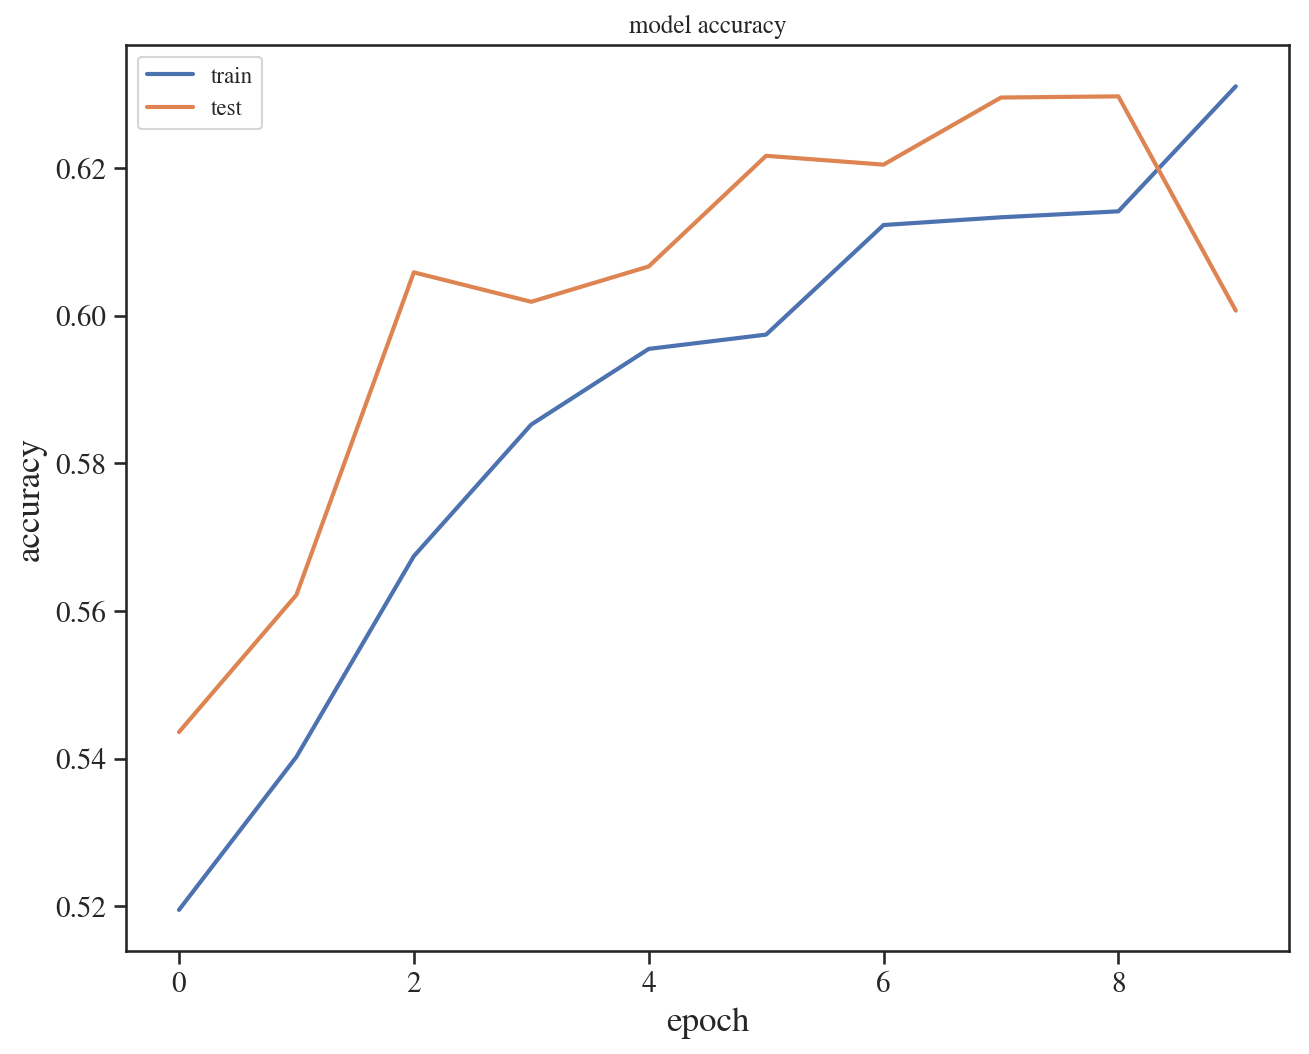

In [130]:
# summarize history for accuracy
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

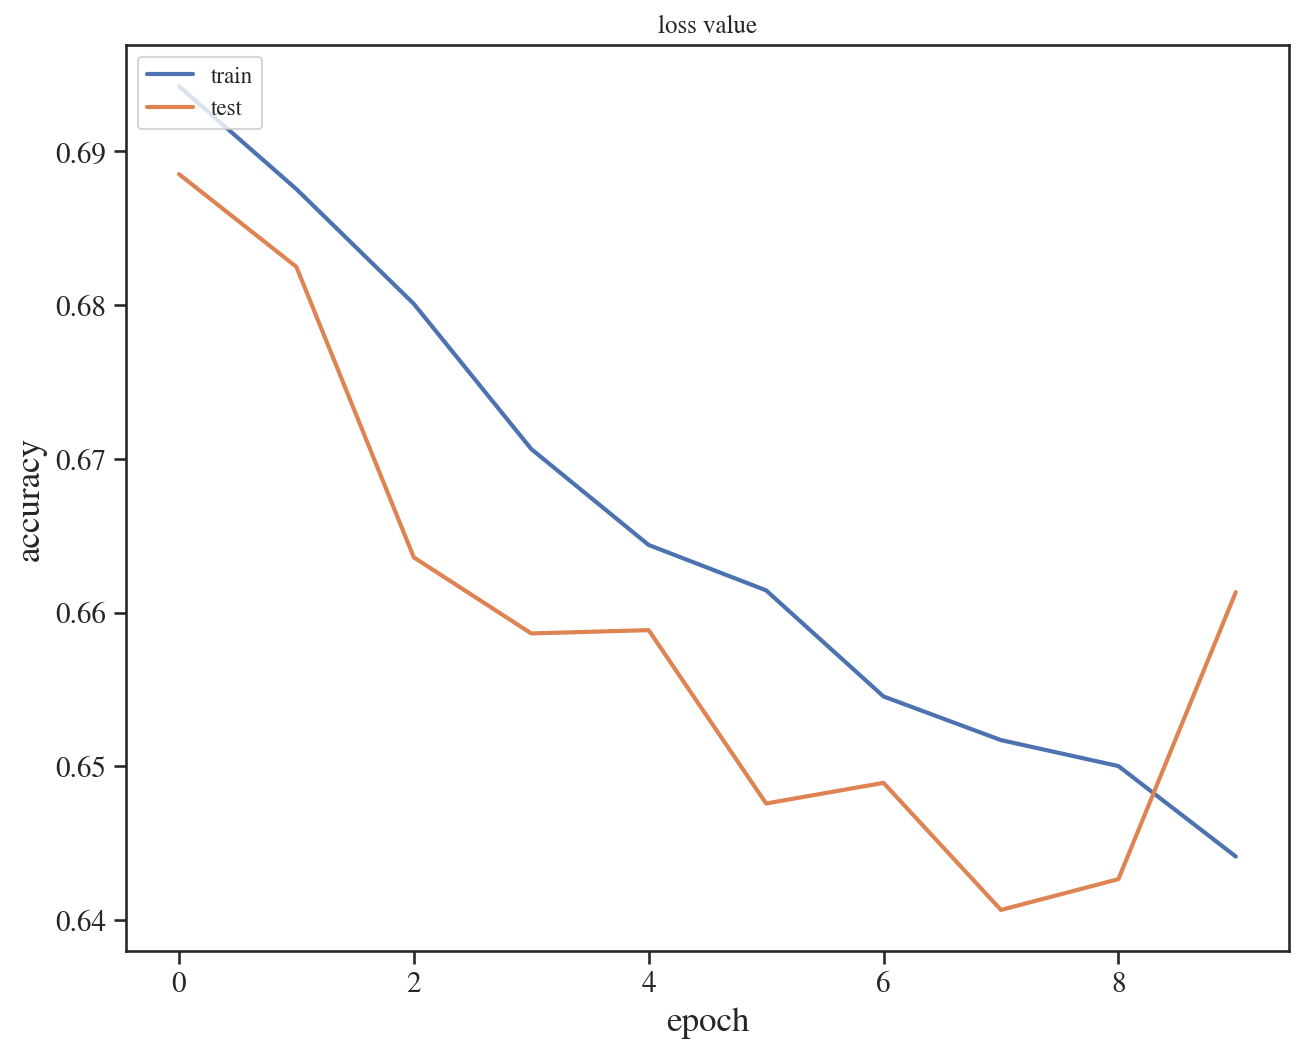

In [131]:
# summarize history for loss value
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss value')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [133]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_x, test_labels)

print('Test accuracy:', test_acc)

12546/12546 [==============================] - 9s 722us/step
Test accuracy: 0.6006695361071258


In [134]:
predictions = model.predict(test_x)

In [135]:
predictions[2]

array([0.27125415, 0.7287458 ], dtype=float32)